<!--BOOK_INFORMATION-->
<img style="float: right; width: 100px" src="https://raw.github.com/pyomeca/design/master/logo/logo_cropped.svg?sanitize=true">

# Effective computation in Biomechanics
## with [pyomeca](https://github.com/pyomeca/pyomeca)
Romain Martinez (martinez.staps@gmail.com | [GitHub](https://github.com/romainmartinez))

<!--NAVIGATION-->
< [Other modules](02.03-Other-modules.ipynb) | [Contents](Index.ipynb) | [Advanced statistical analysis of biomechanical time series](04.00-Time-series-statistics.ipynb) >

# Data visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Matplotlib

[Matplotlib](https://matplotlib.org/) is the basic, yet the most complete python plotting library.

It provides a plotting system similar to that of _MATLAB_, where everything is customizable.

Matplotlib has built up something of a bad reputation for being verbose. I think that complaint is valid, but misplaced. Matplotlib lets you control essentially anything on the figure.

### Basic plot

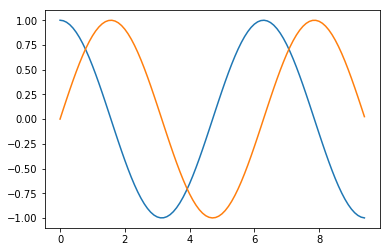

In [2]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_cos)
plt.plot(x, y_sin)
plt.show()

### A better plot

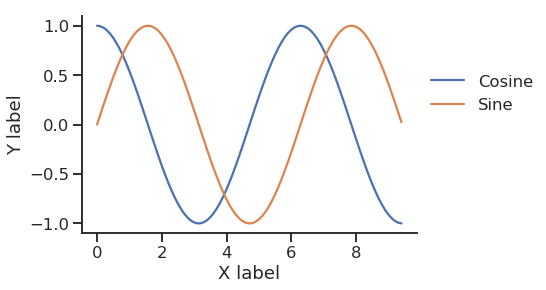

In [3]:
import seaborn as sns
sns.set(style="ticks", context="talk")

plt.plot(x, y_cos, label="Cosine")
plt.plot(x, y_sin, label="Sine")

plt.xlabel("X label")
plt.ylabel("Y label")
plt.legend(bbox_to_anchor=(1, 0.8), frameon=False)

sns.despine()

### Subplot

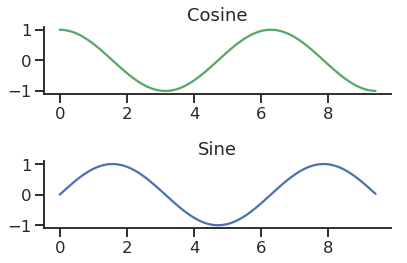

In [4]:
_, ax = plt.subplots(nrows=2, ncols=1)

ax[0].plot(x, y_cos, 'g-')
ax[0].set_title('Cosine')

ax[1].plot(x, y_sin, 'b-')
ax[1].set_title('Sine')

plt.tight_layout()
sns.despine()

### Examples gallery


The [examples gallery](https://matplotlib.org/gallery/index.html) is a good place to see what can be done with Matplotlib.

## Other libraries

In real life (publication figures), I prefer two other libraries:
    
- [Seaborn](http://seaborn.pydata.org/): provides a high-level interface for drawing attractive statistical graphics. It gives a great API for quickly exploring 
different visual representations of your data.
  - [Examples gallery](https://seaborn.pydata.org/examples/wide_data_lineplot.html)
- [Altair](https://github.com/altair-viz/altair): like seaborn, but interactive and less verbose. However, it is a young library still under development.
  - [Examples gallery](https://altair-viz.github.io/gallery/index.html)

## Data visualisation checklist

### 1. Start with a question in mind

### 2. Choose metrics that matter
  - not too many
  - variable that can resonate with your audience

### 3. Use the right chart type
  - examples in [data-to-viz](https://www.data-to-viz.com/)
  - no 3D-charts, pie chart or radar chart

### 4. Write with the good fonts
  - not to small
  - **bold** or _italic_, not both
  - avoid ALL CAPS
  - no angles
  - keep it simple

### 5. Highlight with the right colour
  - the less the better (less than 7)
  - same variable, same colour

### 6. Look for your data-ink ratio
   - [example](https://speakerdeck.com/cherdarchuk/remove-to-improve-the-data-ink-ratio)

## Case study

In [5]:
from pathlib import Path
import pandas as pd

In [6]:
DATA_PATH = Path("../data/trials/")

In [7]:
emgs = pd.read_csv(DATA_PATH / 'emgs.csv')
emgs.head()

,index,delt_ant,filename
0,0,0.008846,12kg_H2_3
1,1,0.261197,12kg_H2_3
2,2,0.167504,12kg_H2_3
3,3,0.147101,12kg_H2_3
4,4,0.291319,12kg_H2_3


In [8]:
# add columns based on filename
emgs["weight"], emgs["height"], emgs["trial"] = emgs["filename"].str.split("_").str
emgs.head()

,index,delt_ant,filename,weight,height,trial
0,0,0.008846,12kg_H2_3,12kg,H2,3
1,1,0.261197,12kg_H2_3,12kg,H2,3
2,2,0.167504,12kg_H2_3,12kg,H2,3
3,3,0.147101,12kg_H2_3,12kg,H2,3
4,4,0.291319,12kg_H2_3,12kg,H2,3


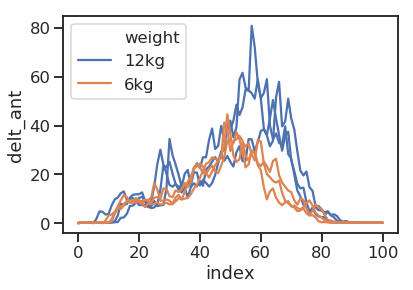

In [9]:
# bad example
sns.lineplot(
    x="index", y="delt_ant", hue="weight", data=emgs, estimator=None, units="trial"
);

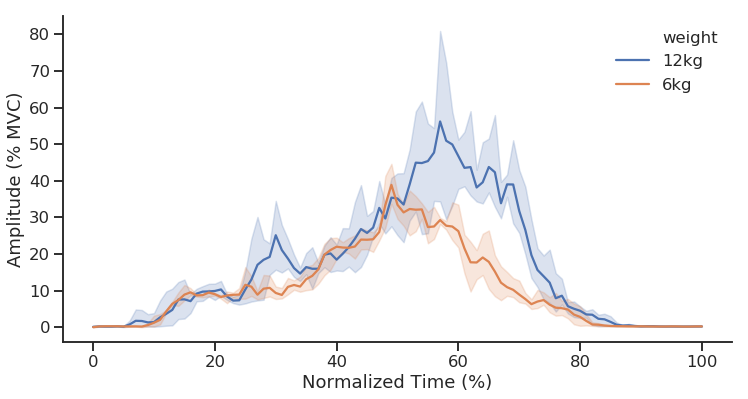

In [10]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="index", y="delt_ant", hue="weight", data=emgs)

plt.xlabel("Normalized Time (%)")
plt.ylabel("Amplitude (% MVC)")

plt.legend(frameon=False)

sns.despine()

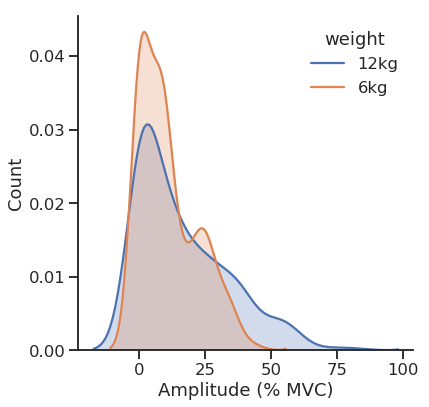

In [11]:
sns.FacetGrid(emgs, hue="weight", height=6).map(sns.kdeplot, "delt_ant", shade=True)

plt.xlabel("Amplitude (% MVC)")
plt.ylabel('Count')

plt.legend(title='weight', frameon=False)

sns.despine()

<!--NAVIGATION-->
< [Other modules](02.03-Other-modules.ipynb) | [Contents](Index.ipynb) | [Advanced statistical analysis of biomechanical time series](04.00-Time-series-statistics.ipynb) >